Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn. Обучение с учителем в Scikit-learn

# Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

Выборка данных

In [169]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [170]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [171]:
print(boston["data"])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [172]:
print(boston["target"])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [173]:
print(boston["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [174]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [175]:
print(boston["filename"])

boston_house_prices.csv


In [176]:
data = boston["data"]

In [177]:
target = boston["target"]

In [178]:
feature_names = boston["feature_names"]

In [179]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [181]:
X.shape

(506, 13)

In [182]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [183]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбивка датафреймов на тренировочные тестовые выборки x,y

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Построение модели

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
lr = LinearRegression()

Обучение модели

In [189]:
lr.fit(X_train, y_train)

LinearRegression()

In [190]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [191]:
y_pred = lr.predict(X_test)

In [192]:
y_pred.shape

(152, 1)

In [193]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(15)

,y_test,y_pred
297,20.3,18.813280
439,12.8,13.279113
87,22.2,26.582885
362,20.8,18.533350
103,19.3,21.328007
461,17.7,20.356003
465,19.9,18.228046
256,44.0,36.575479
478,14.6,19.641025
499,17.5,19.254466


Оценка качества

In [194]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]
check_test.head()

,y_test,y_pred,error
297,20.3,18.813280,-1.486720
439,12.8,13.279113,0.479113
87,22.2,26.582885,4.382885
362,20.8,18.533350,-2.266650
103,19.3,21.328007,2.028007


In [195]:
from sklearn.metrics import r2_score
r2_score_1=r2_score(check_test["y_pred"], check_test["y_test"])
r2_score_1

0.6630622313707483

Средняя квадратическая ошибка

In [196]:
from sklearn.metrics import mean_squared_error
mean_squared_error(check_test["y_pred"], check_test["y_test"])

23.41584920500716

Средняя абсолютная ошибка

In [197]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.4812070612498367

# Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [198]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [199]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [200]:
y_pred = model.predict(X_test)
y_pred.shape

(152,)

In [201]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(15)

,y_test,y_pred
297,20.3,20.786494
439,12.8,11.382234
87,22.2,21.924072
362,20.8,20.437834
103,19.3,20.461334
461,17.7,18.584756
465,19.9,20.686016
256,44.0,40.366295
478,14.6,14.637963
499,17.5,19.634025


In [202]:
r2_score_2=r2_score(check_test["y_pred"], check_test["y_test"])
r2_score_2

0.8726184184371569

In [203]:
r2_score_1<r2_score_2

True

In [204]:
from sklearn.metrics import mean_squared_error
mean_squared_error(check_test["y_pred"], check_test["y_test"])

9.342853091344825

In [205]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(check_test["y_pred"], check_test["y_test"])

2.28688544377354

RandomForestRegressor модель сработала лучше это можно определить не только показатель скора, но и более низкие опказатели по ошибкам

# Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [217]:
?RandomForestRegressor

In [218]:
model.feature_importances_

array([0.04531967, 0.00099474, 0.00712403, 0.00132242, 0.02363412,
       0.41217285, 0.0169783 , 0.06064211, 0.00494366, 0.01522417,
       0.01861414, 0.01295866, 0.38007111])

In [219]:
model.feature_importances_.sum()

1.0

In [220]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.514182,11.412429,10.931186,0.073446,0.551279,6.281291,67.838418,3.827429,9.251412,404.288136,18.439831,358.584463,12.408559
std,9.035967,22.812748,6.872053,0.261237,0.112838,0.716781,28.809327,2.093531,8.615590,166.998300,2.173409,88.879409,6.921499
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.082268,0.000000,5.130000,0.000000,0.448250,5.881000,44.575000,2.101725,4.000000,277.500000,17.400000,376.602500,6.757500
50%,0.251680,0.000000,8.560000,0.000000,0.535000,6.217500,76.250000,3.338900,5.000000,330.000000,18.900000,391.955000,11.330000
75%,2.897595,19.500000,18.100000,0.000000,0.624000,6.587250,94.375000,5.287300,8.000000,666.000000,20.200000,396.295000,16.275000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [229]:
from matplotlib import pyplot as plt

In [233]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.377240,0.596456,-0.845366,-0.281546,-0.872202,0.244086,-0.001335,1.625427,-0.145455,-0.721315,0.580633,0.431706,-0.821585
1,-0.383941,0.420867,-0.771047,-0.281546,-0.996449,-0.395786,-1.614205,1.428926,-0.610387,-0.967174,-0.755565,0.431706,-0.575625
2,-0.324068,-0.500974,1.596950,-0.281546,0.645388,0.126730,1.044944,-0.717521,-0.610387,0.196159,1.271770,0.306190,-0.186431
3,-0.384290,3.010801,-1.371425,-0.281546,-1.307067,1.153599,-1.085851,1.665368,-0.842853,-0.451470,-2.690748,-0.048161,-0.549583
4,-0.332737,-0.500974,-0.689442,-0.281546,-0.392963,1.504271,0.130753,0.153341,-0.145455,-0.583394,-0.479110,0.354751,-1.110948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.374989,-0.500974,-0.134238,-0.281546,-0.037971,-0.571821,0.182893,-0.645722,-0.377921,0.166176,-0.294807,-0.224829,0.428467
350,2.485419,-0.500974,1.044660,-0.281546,1.133502,-1.365374,0.739055,-1.042743,1.714272,1.569371,0.811012,-2.605235,2.059032
351,-0.365734,0.464765,-0.738988,-0.281546,-1.067448,0.218938,-2.048706,1.707318,-0.261688,-0.445473,0.304178,0.208279,-1.275886
352,-0.298001,0.376970,-1.014404,-0.281546,0.849509,1.460961,0.926760,-0.836436,-0.494154,-0.841246,-2.506445,0.392496,-0.167623


In [235]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.494437,-0.459843,0.338431,-0.250873,-1.027602,-0.751563,-0.464262,1.219794,-0.703260,-0.747989,-1.161975,0.462834,0.344581
1,0.740316,-0.459843,0.952317,-0.250873,1.450380,-0.995392,0.891867,-0.892391,1.549544,1.447624,0.796327,0.462834,1.271364
2,-0.503718,-0.459843,-1.046483,-0.250873,-0.929464,-0.256426,-0.509592,0.013126,-0.815901,-0.992593,0.003681,0.444704,-0.629593
3,-0.022248,-0.459843,0.952317,-0.250873,1.695725,-1.391801,0.978750,-0.758045,1.549544,1.447624,0.796327,0.295935,-0.399214
4,-0.485016,-0.459843,-0.448752,-0.250873,-0.348815,-0.232492,0.646328,-0.471389,-0.590620,-0.194718,1.122710,0.437659,0.028633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.504288,-0.459843,-1.230062,-0.250873,-0.839504,0.060701,-2.005490,0.701270,-0.703260,0.073182,-0.742339,0.238127,-0.774403
148,0.640748,-0.459843,0.952317,-0.250873,1.066007,-0.148722,0.842759,-0.904587,1.549544,1.447624,0.796327,0.462834,0.256379
149,-0.498634,-0.459843,0.046175,-0.250873,0.084628,0.750303,0.718101,-0.624216,-1.041181,-0.841172,1.169337,0.427092,-0.887618
150,-0.507910,2.810152,-1.482666,-0.250873,-1.297481,1.487774,-1.367089,1.683717,-0.928541,-0.515033,-2.747266,0.462834,-1.203567


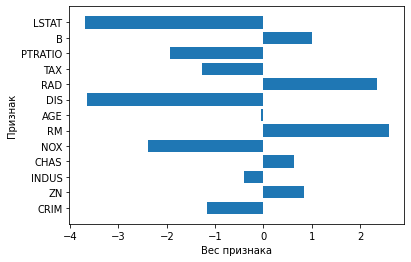

In [231]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()